## Volatility

####  From a financial standpoint, the standard deviation can help investors quantify how risky an investment is and determine their minimum required return on the investment.

- Annualized Standard Deviation = Standard Deviation of Daily Returns * Square Root (252)
- If standard deviation of daily returns were 2%, the annualized volatility will be = 2%*Sqrt(252) = 31.6%

In [1]:
import pandas_datareader as pdr

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [5]:
ticker = 'AAPL'
start = dt.datetime(2019, 1, 1)

data = pdr.get_data_yahoo(ticker, start)

In [6]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.382229
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.559078
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.034378
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,35.954170
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.639565


In [8]:
# create a new col for pct change
#Percentage change between the current and a prior element.

data['pct_change'] = data['Close'].pct_change()

In [9]:
data.head()  #the 1st row is NaN

,High,Low,Open,Close,Volume,Adj Close,pct_change
Date,,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.382229,NaN
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.559078,-0.099607
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.034378,0.042689
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,35.954170,-0.002226
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.639565,0.019063


In [11]:
# need to use np.log()
data['Log return'] = np.log(data['Close']/data['Close'].shift())

In [12]:
data.head()  #compare data in pct_change and Log return cols

,High,Low,Open,Close,Volume,Adj Close,pct_change,Log return
Date,,,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.382229,NaN,NaN
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.559078,-0.099607,-0.104924
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.034378,0.042689,0.041803
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,35.954170,-0.002226,-0.002228
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.639565,0.019063,0.018884


In [14]:
# see inside the log function
data['Close']/data['Close'].shift()

Date
2019-01-02         NaN
2019-01-03    0.900393
2019-01-04    1.042689
2019-01-07    0.997774
2019-01-08    1.019063
                ...   
2021-10-25    0.999664
2021-10-26    1.004575
2021-10-27    0.996852
2021-10-28    1.024992
2021-10-29    0.981844
Name: Close, Length: 714, dtype: float64

In [17]:
# shift the data down, ex: shift(2) down for 2 rows
data['Close'].shift()

Date
2019-01-02           NaN
2019-01-03     39.480000
2019-01-04     35.547501
2019-01-07     37.064999
2019-01-08     36.982498
                 ...    
2021-10-25    148.690002
2021-10-26    148.639999
2021-10-27    149.320007
2021-10-28    148.850006
2021-10-29    152.570007
Name: Close, Length: 714, dtype: float64

In [18]:
data['Close']

Date
2019-01-02     39.480000
2019-01-03     35.547501
2019-01-04     37.064999
2019-01-07     36.982498
2019-01-08     37.687500
                 ...    
2021-10-25    148.639999
2021-10-26    149.320007
2021-10-27    148.850006
2021-10-28    152.570007
2021-10-29    149.800003
Name: Close, Length: 714, dtype: float64

In [20]:
data['Log return'].std()

0.021804339015518395

In [23]:
volatility = data['Log return'].std()*252**.5

In [24]:
volatility

0.3461331512232276

In [43]:
AnnVol = str(round(volatility, 4)*100)

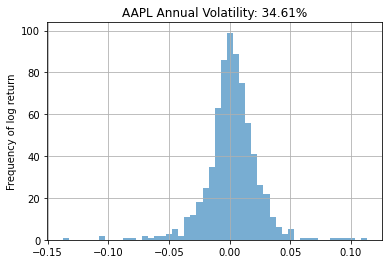

In [45]:
fig, ax =plt.subplots()
data['Log return'].hist(ax=ax, bins=50, alpha= 0.6)
ax.set_label('Log return')
ax.set_ylabel('Frequency of log return')
ax.set_title('AAPL Annual Volatility: '+ AnnVol+'%');

###  Average True Range (ATR)

Formula
$TR = \max[H − L, |H − C_P|, |L − C_P|]$

$ATR = \frac{1}{n}\sum_{i=1}^{n} TR_i$

- $TR_i$: A particular True Range
- $n$: The time period employed
- $H$: Current High
- $L$: Current Low
- $C_P$: Previous Close

In [171]:
tickers =['AAPL', 'NFLX']
start = dt.datetime(2020,1,1)
data = pdr.get_data_yahoo(tickers, start)

In [172]:
data.head()

Attributes  Adj Close                  Close                   High  \
Symbols          AAPL        NFLX       AAPL        NFLX       AAPL   
Date                                                                  
2020-01-02  74.096466  329.809998  75.087502  329.809998  75.150002   
2020-01-03  73.376076  325.899994  74.357498  325.899994  75.144997   
2020-01-06  73.960762  335.829987  74.949997  335.829987  74.989998   
2020-01-07  73.612930  330.750000  74.597504  330.750000  75.224998   
2020-01-08  74.797081  339.260010  75.797501  339.260010  76.110001   

Attributes                    Low                   Open              \
Symbols           NFLX       AAPL        NFLX       AAPL        NFLX   
Date                                                                   
2020-01-02  329.980011  73.797501  324.779999  74.059998  326.100006   
2020-01-03  329.859985  74.125000  325.529999  74.287498  326.779999   
2020-01-06  336.359985  73.187500  321.200012  73.447502  323.119995   
2020-01-07  336.700012  74.370003  330.299988  74.959999  336.470001   
2020-01-08  342.700012  74.290001  331.049988  74.290001  331.489990   

Attributes       Volume             
Symbols            AAPL       NFLX  
Date                                
2020-01-02  135480400.0  4485800.0  
2020-01-03  146322800.0  3806900.0  
2020-01-06  118387200.0  5663100.0  
2020-01-07  108872000.0  4703200.0  
2020-01-08  132079200.0  7104500.0

In [173]:
high_low = data['High']-data['Low']
# absolute number, np.abs()
high_cp = np.abs(data['High']-data['Close'].shift())
low_cp = np.abs(data['Low']-data['Close'].shift())

In [182]:
df = pd.concat([high_low, high_cp, low_cp], axis=1)
df.head()

Symbols,AAPL,NFLX,AAPL,NFLX,AAPL,NFLX
Date,,,,,,
2020-01-02,1.352501,5.200012,NaN,NaN,NaN,NaN
2020-01-03,1.019997,4.329987,0.057495,0.049988,0.962502,4.279999
2020-01-06,1.802498,15.159973,0.632500,10.459991,1.169998,4.699982
2020-01-07,0.854996,6.400024,0.275002,0.870026,0.579994,5.529999
2020-01-08,1.820000,11.650024,1.512497,11.950012,0.307503,0.299988


In [185]:
datas = map('Date','Symbols')

AttributeError: 'map' object has no attribute 'to_DataFrame'

In [150]:
## find the max for each row, not col
true_range = np.max(df)
true_range

0    56.959991
1    91.519989
2    55.089996
dtype: float64

In [151]:
true_range = np.max(df, axis=1)
true_range

Date
2020-01-02     5.200012
2020-01-03     4.329987
2020-01-06    15.159973
2020-01-07     6.400024
2020-01-08    11.950012
                ...    
2021-10-26    13.719971
2021-10-27     9.559998
2021-10-28    13.880005
2021-10-29    19.729980
2021-11-01    13.770020
Length: 463, dtype: float64

In [152]:
#rolling window calculations
# take previous 14 days'mean()
average_true_range = true_range.rolling(14).mean()

In [153]:
average_true_range

Date
2020-01-02          NaN
2020-01-03          NaN
2020-01-06          NaN
2020-01-07          NaN
2020-01-08          NaN
                ...    
2021-10-26    15.392138
2021-10-27    14.904279
2021-10-28    14.971422
2021-10-29    15.477853
2021-11-01    15.342141
Length: 463, dtype: float64

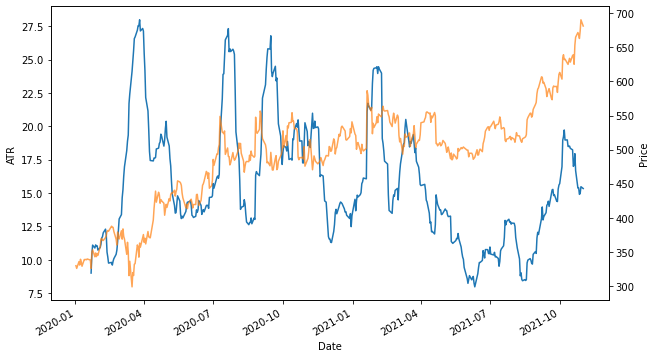

In [169]:
fig, ax = plt.subplots(figsize=(10,6))
average_true_range.plot(ax=ax)
# need to add secondary_y otherwise it is hard to see the chart
ax2 = data['Adj Close'].plot(ax=ax, secondary_y =True, alpha=.7)
ax.set_ylabel('ATR')
# how to set secondary y label: name the price plot as ax2
ax2.set_ylabel('Price');

### Compare 2 stocks